In [1]:
!pip3 install pickle5
import pickle5 as pickle
import numpy as np
import pandas as pd
from statsmodels.tsa.seasonal import seasonal_decompose

from sklearn.decomposition import KernelPCA
from sklearn.svm import SVC, NuSVC
from sklearn.metrics import confusion_matrix, classification_report

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 13.5 MB/s 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [2]:
# load data 
with open('/content/drive/MyDrive/AI_programming/Dataset2', 'rb') as handle:
    data = pickle.load(handle)
    y = pickle.load(handle)
    testdata = pickle.load(handle)
    testy = pickle.load(handle)

# transform to dataframe 
data_df = pd.DataFrame(data)
y_df = pd.DataFrame(y)
testdata_df = pd.DataFrame(testdata)
testy_df = pd.DataFrame(testy)

# Data Description 
- basic information
  - number of train & test data 
- statistics 
- label information

In [171]:
# print basic information 
def data_info(x, y):
    print("x.shape: ",x.shape," y.shape: ", y.shape)
    lbl=np.unique(y)
    print("label_info:")
    print(lbl)
    print("per-class number")
    df = pd.DataFrame(y)
    for i in range(len(lbl)):
        nums = df[df[0] == lbl[i]].count()
        print(lbl[i],":" ,nums.values)


In [172]:
data_info(data,y)

x.shape:  (200, 80)  y.shape:  (200,)
label_info:
[0. 1.]
per-class number
0.0 : [100]
1.0 : [100]


In [173]:
data_info(testdata,testy)

x.shape:  (400, 80)  y.shape:  (400,)
label_info:
[0. 1.]
per-class number
0.0 : [200]
1.0 : [200]


In [174]:
pd.DataFrame(data)

,0,1,2,3,4,...,75,76,77,78,79
0,1.504400,-1.752114,1.845582,2.356077,2.082137,...,1.321498,0.092595,-0.307086,1.980530,2.759271
1,-0.611505,-0.374634,0.532804,0.904019,0.713504,...,0.697199,-1.628836,-0.425414,-0.751046,-0.164086
2,0.206142,1.819827,1.371899,0.855946,0.036729,...,-0.576464,2.903690,1.368655,0.982679,2.417441
3,-1.442224,0.105535,0.493595,0.518771,1.062785,...,1.194212,0.168850,-0.273234,-0.865923,-0.581641
4,-1.250162,-1.222312,-1.076287,-1.332252,0.946180,...,1.011281,-1.191288,1.342311,1.091403,1.730275
...,...,...,...,...,...,...,...,...,...,...,...
195,0.594266,1.387261,1.566027,1.236675,0.916292,...,0.597874,0.911599,0.272978,2.129287,-0.590149
196,0.614757,0.872680,-2.019999,1.165225,-0.540442,...,0.486028,-2.635207,0.647919,-0.964973,0.483947
197,-1.204028,-0.814811,-0.173549,-0.733251,-1.393954,...,0.453850,0.591489,-0.466551,0.126226,0.582052
198,0.727475,-1.091544,1.591986,2.588876,0.446838,...,-0.424182,0.387061,0.871196,1.014908,0.643886


In [175]:
# statistical descriptions

pd.set_option('display.max_columns', 10)
pd.DataFrame(data).describe()

,0,1,2,3,4,...,75,76,77,78,79
count,200.000000,200.000000,200.000000,200.000000,200.000000,...,200.000000,200.000000,200.000000,200.000000,200.000000
mean,0.517334,0.470278,0.532742,0.623034,0.465725,...,0.562168,0.533517,0.532547,0.368732,0.462188
std,1.184893,1.126869,1.166408,1.128527,1.177127,...,1.013791,1.096624,1.109566,1.054264,1.083575
min,-2.250894,-2.093878,-2.333184,-2.706717,-2.692306,...,-1.883003,-2.635207,-3.261826,-3.022999,-2.256594
25%,-0.349649,-0.310156,-0.250327,-0.180374,-0.378999,...,-0.278949,-0.188104,-0.178580,-0.253884,-0.301883
50%,0.549731,0.526950,0.490512,0.683688,0.476582,...,0.542980,0.489923,0.667405,0.333904,0.474960
75%,1.317116,1.282290,1.452413,1.357684,1.336189,...,1.302980,1.265066,1.296486,1.078843,1.250051
max,3.297516,3.401776,3.945229,3.513855,3.359325,...,2.875418,3.643230,3.286674,2.773621,2.894728


In [176]:
pd.DataFrame(y).describe()

,0
count,200.000000
mean,0.500000
std,0.501255
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


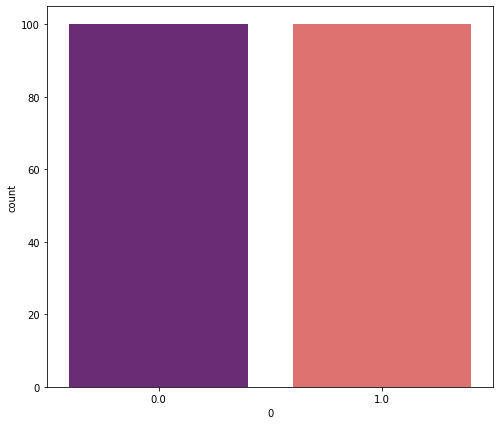

In [177]:
# label information 
plt.figure(figsize = (8, 7))
sns.countplot(x =0, data = y_df, palette = 'magma')

# Exploration Data Analysis
1.  Correlation plot 
2.  Time Series Decomposition
  - Trend, Seasonal, Residual Analysis

## 1. Correlation plot 
plot correlation matrix for 80 features. <br>
we can see each feature has an independent relationship. 

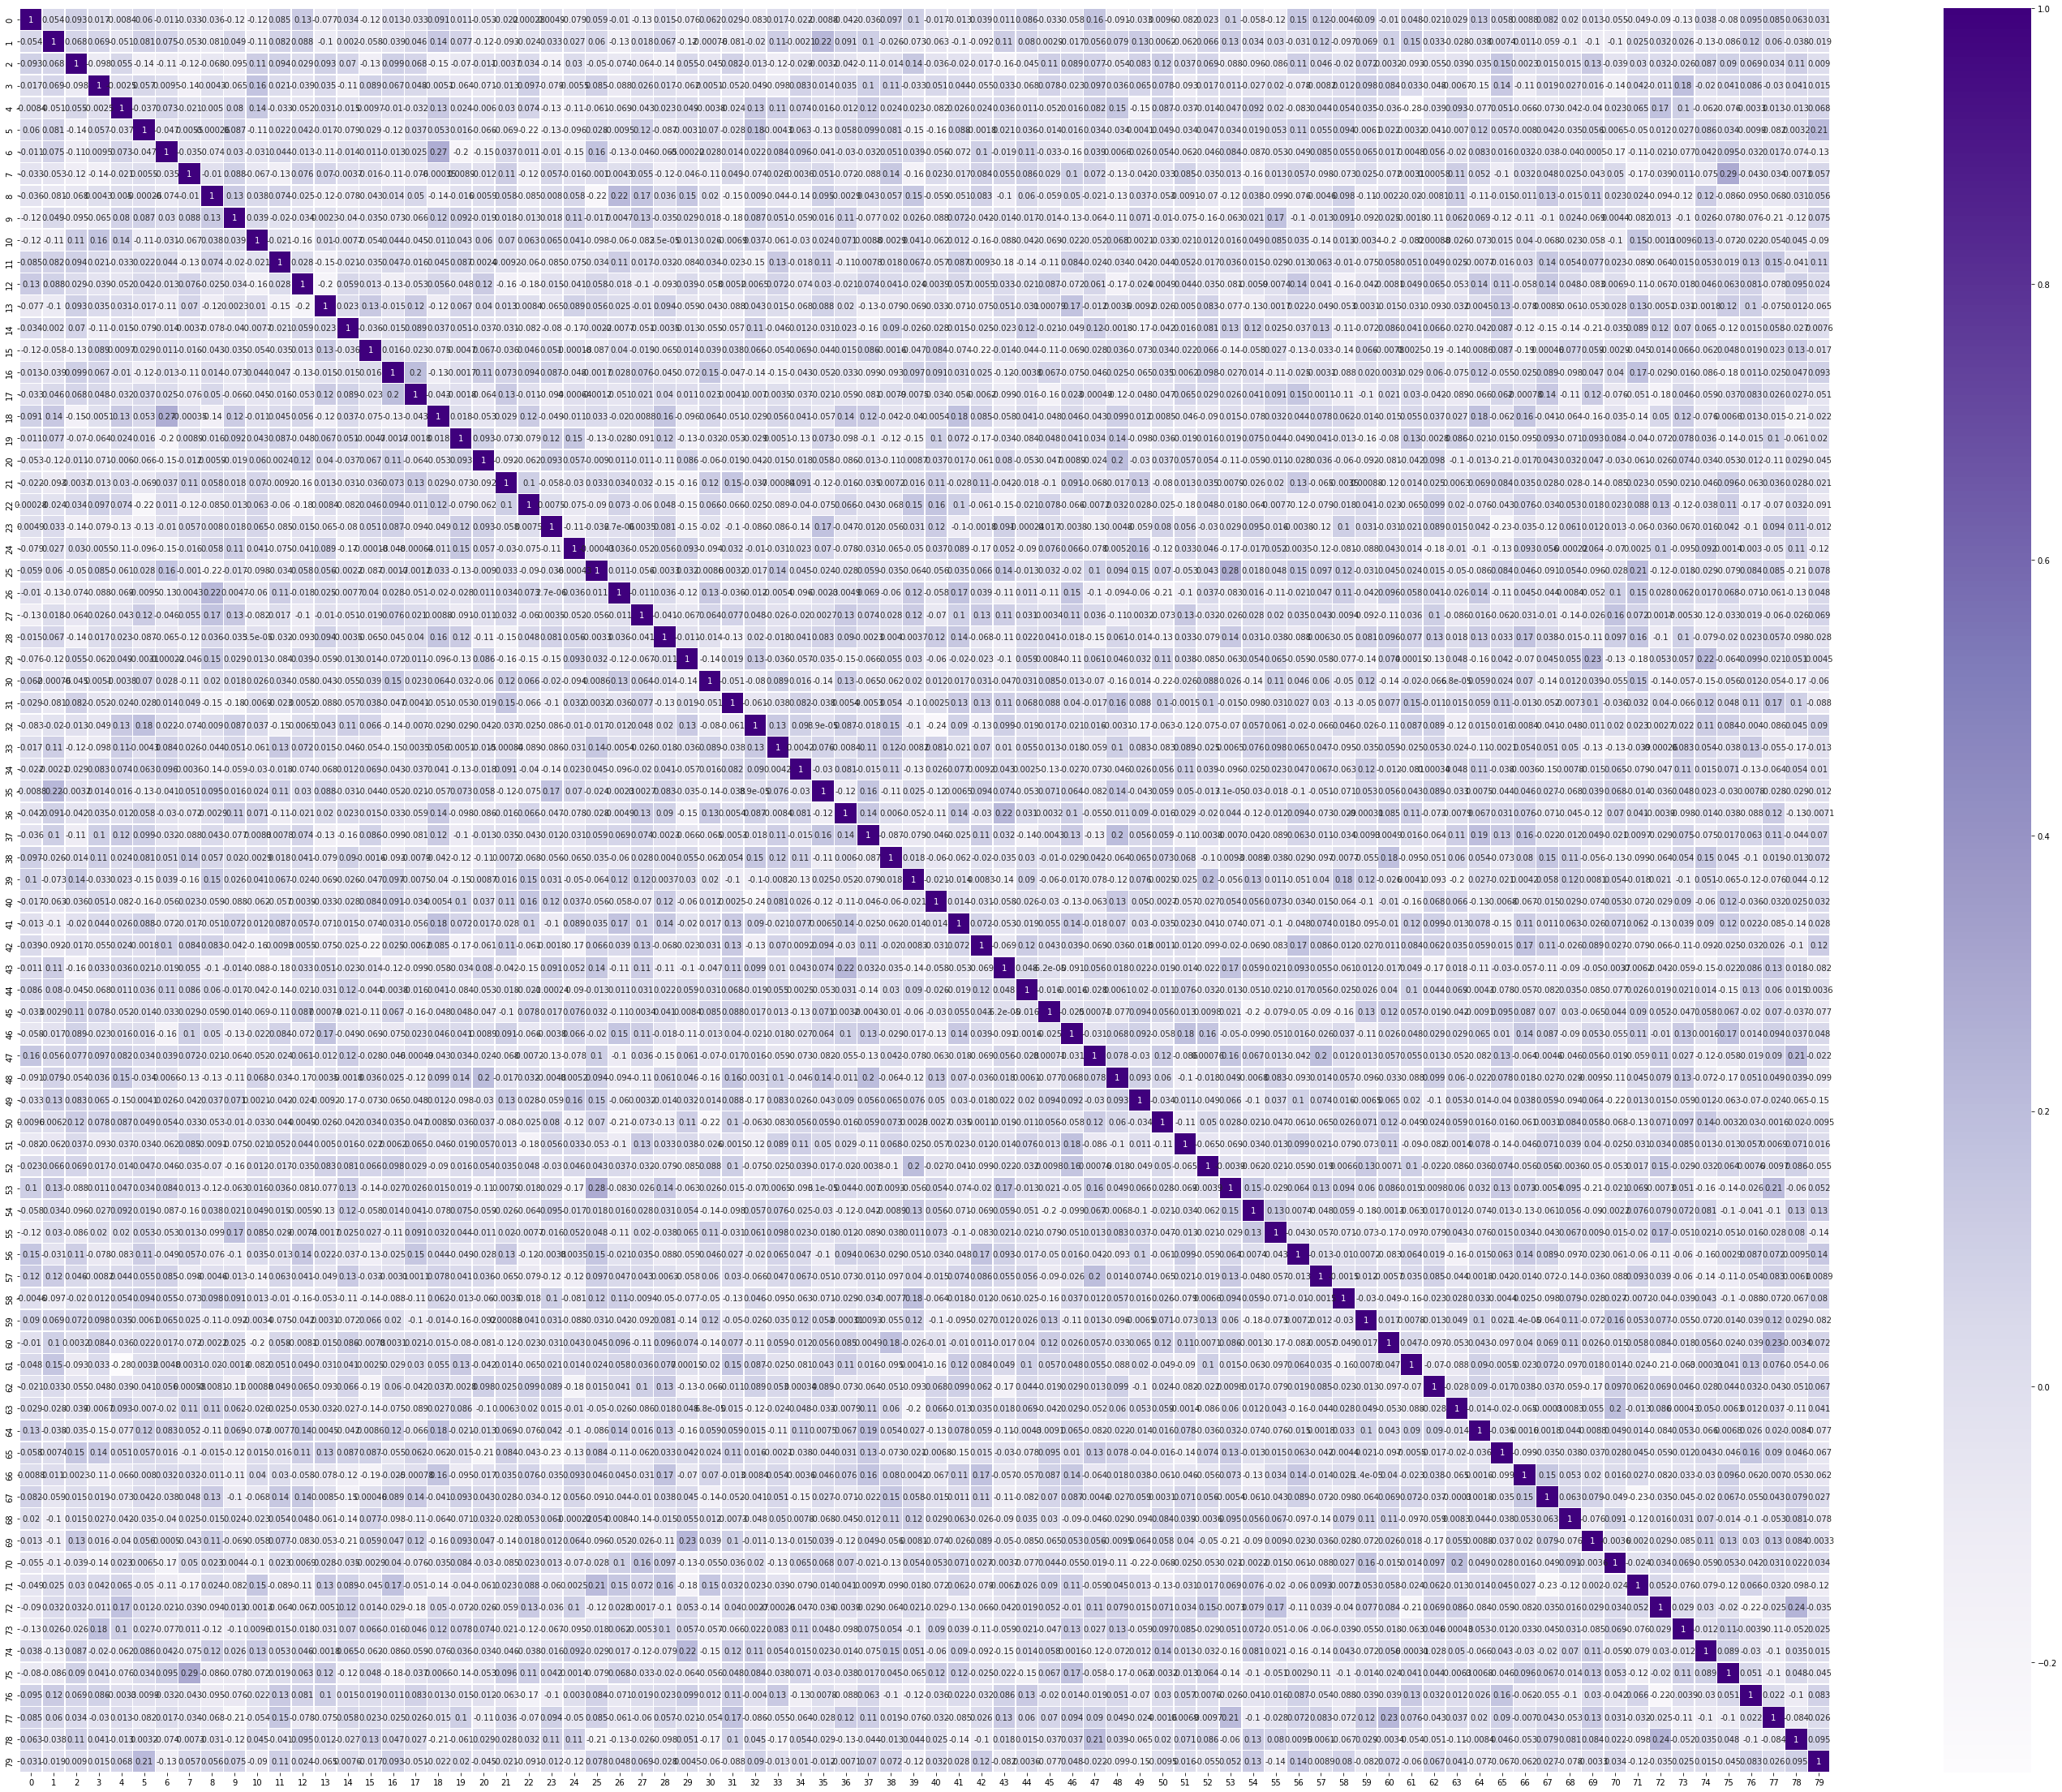

In [11]:
# Correlation Plot 
plt.figure(figsize = (50, 40))
sns.heatmap(data_df.corr(), annot = True, linewidths = .5, cmap = "Purples")

## 2. Time Series Decomposition
As each feature shows independent relationship, we assume data could be a timeseries with 80 features, 200 timestemp. <br>
Therefore, we apply 3types of  __time series decomposition__ method __trend, seasonal and residual__ to find additional pattern.   

In [13]:
len(data[0])

80

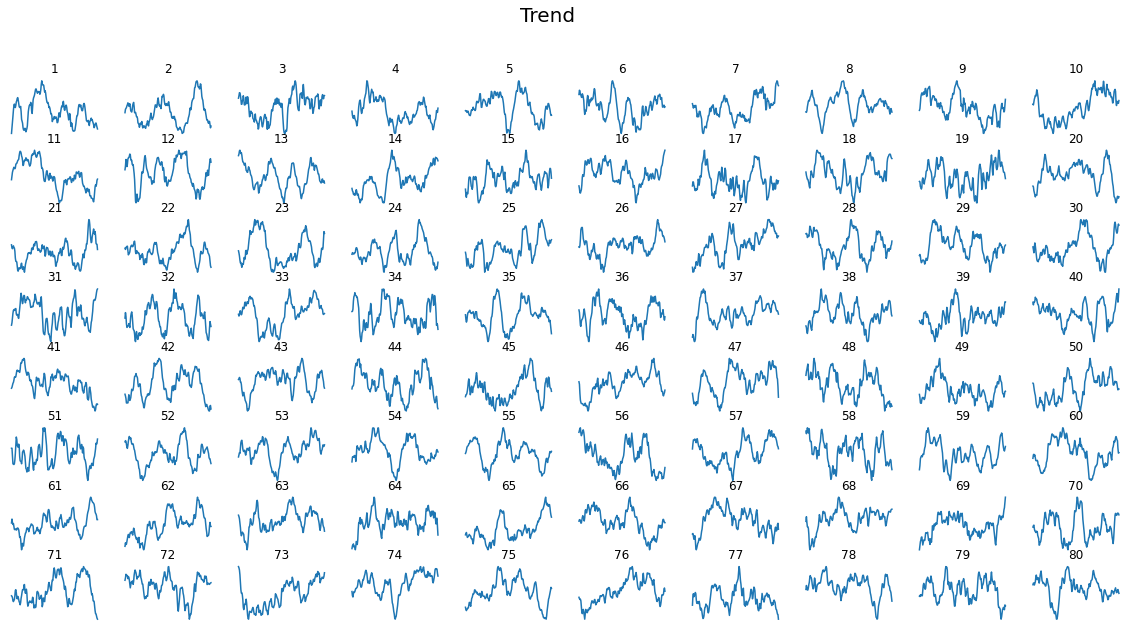

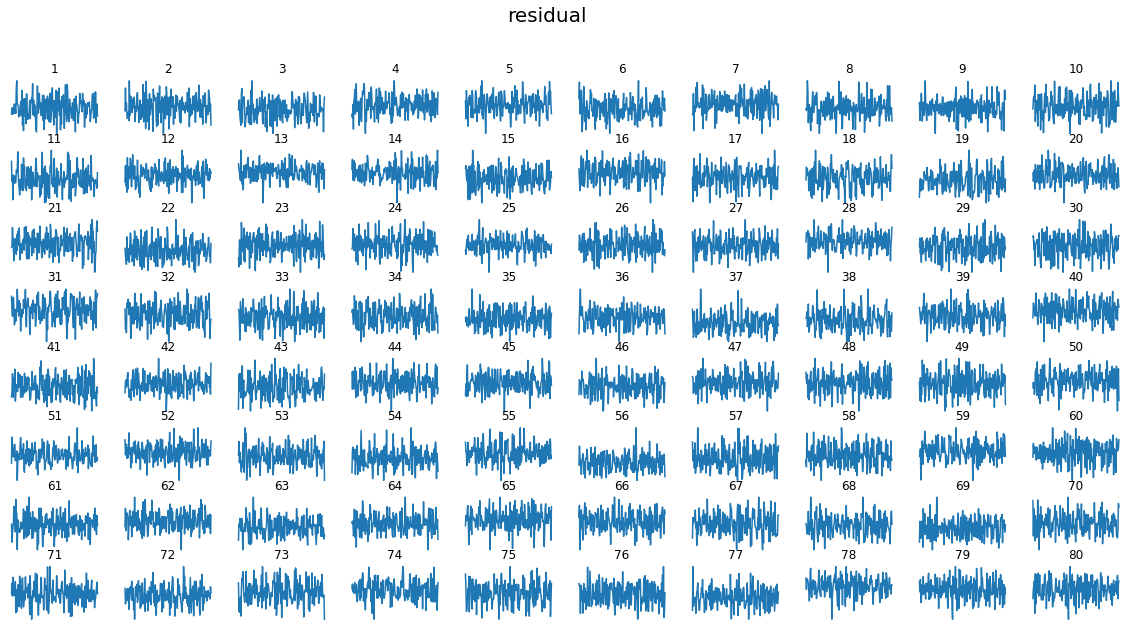

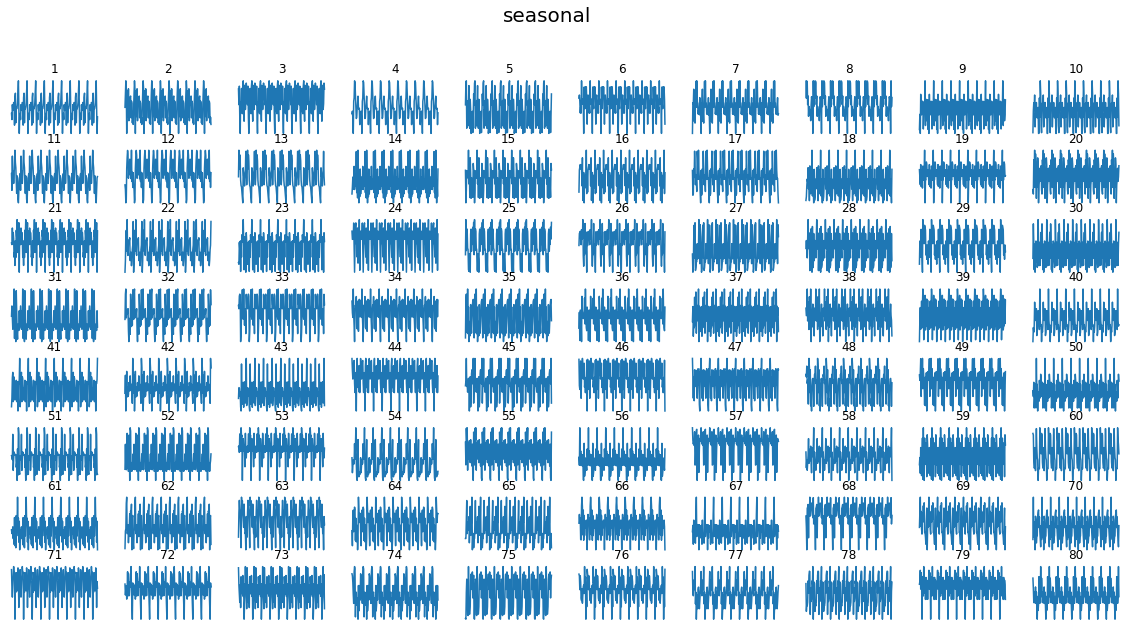

In [26]:
# time series decomposion for totall feature
def plot_data(plot_num, mode="Trend"):
  grid_width = 10
  grid_height = int(plot_num / grid_width)
  fig, axs = plt.subplots(grid_height, grid_width,
                          figsize=(grid_width*2, grid_height+2)) 

  for i in range(len(data[0])): # for all feature
    ax = axs[int(i / grid_width), i % grid_width]
    result = seasonal_decompose(data[:, i], model = 'additive', freq = 20)
    
    if mode == "Trend":
      plot_data = result.trend
    elif mode == "residual":
      plot_data = result.resid
    elif mode == "seasonal":
      plot_data = result.seasonal
    
    ax.set_title(i+1)
    ax.plot(plot_data)
    ax.axis('off')
  
  plt.suptitle(mode, size=20)  
  plt.show()

plot_data(len(data[0]), mode="Trend")
plot_data(len(data[0]), mode="residual")
plot_data(len(data[0]), mode="seasonal")

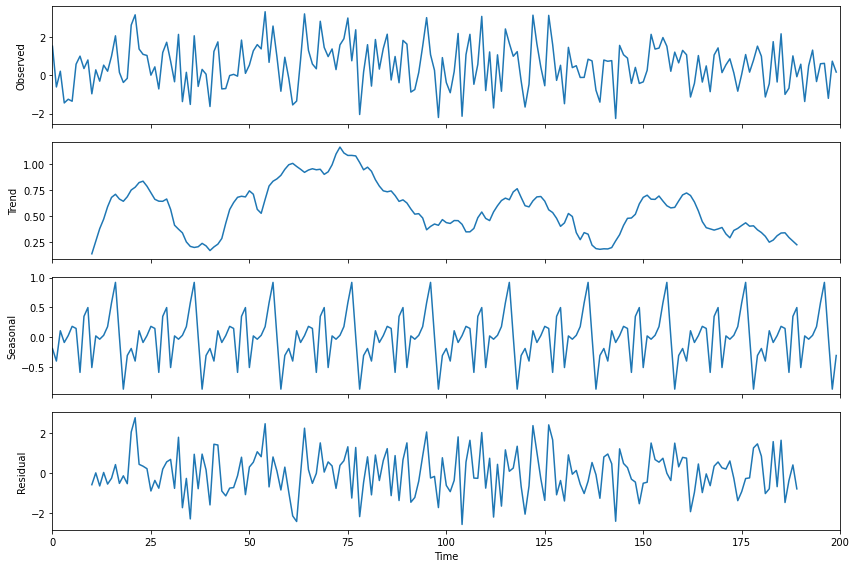

In [12]:
# feature 1 only 

result = seasonal_decompose(data[:, 0], model = 'additive', freq = 20)
plt.rcParams['figure.figsize'] = [12, 8]
result.plot()
plt.show()

- trend:  did not show any particular patterns
- seasonal: clear seasonality
- residual: frequency and amplitude of data seem to have regular patterns

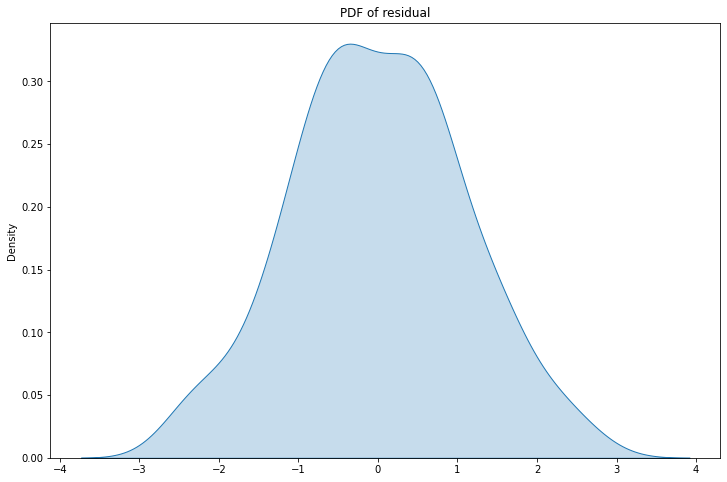

In [27]:
# PDF of residual 
resid = result.resid
sns.kdeplot(resid, x = "value", shade=True)
plt.title("PDF of residual")
plt.show()

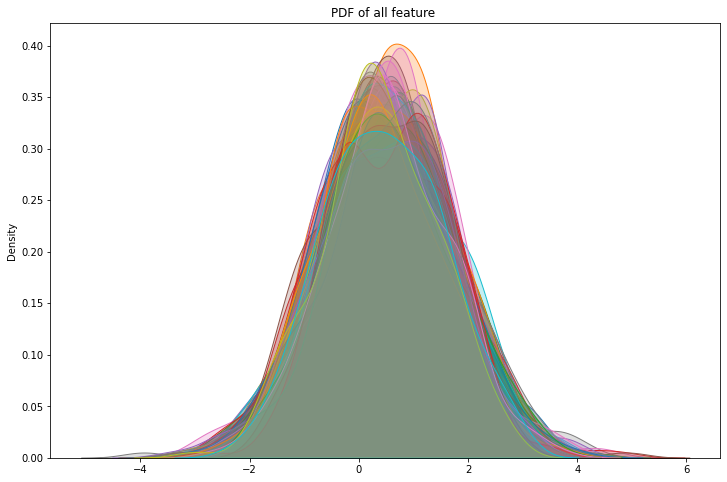

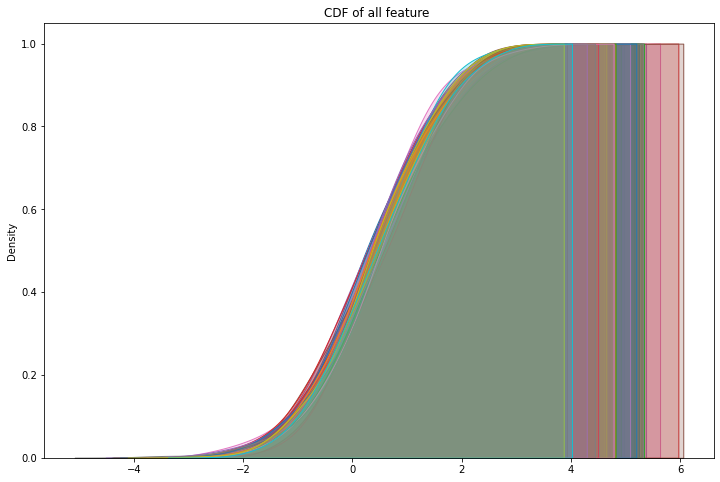

In [40]:
plt.rcParams['figure.figsize'] = [12, 8]
for i in range(len(data[0])):
  sns.kdeplot(data[:, i], x = "value", shade=True)
plt.title("PDF of all feature ")
plt.show()


plt.rcParams['figure.figsize'] = [12, 8]
for i in range(len(data[0])):
  sns.kdeplot(data[:, i], x = "value", shade=True, cumulative=True)
plt.title("CDF of all feature ")
plt.show()

## concolusion of EDA : 
Through the EDA, we discover that each feature was independent of each other. Also assuming that the data were time series, we confirm that each feature followed a Gaussian distribution. Therefore, we conclude that dataset 2 is __normalized time-series tabular data__

# Preprocessing 
- Assume that it is time-series data, quantize and rescale each feature so that the difference between continuous values is larger. 

In [28]:
############# This part will be modified with `qcut' in pandas library #############


# Preprocessing Train data 
new_data = np.array([])

for i in range(80):
  new_col = np.zeros((200, ))
  new_col[np.where(data[:, i] >= np.quantile(data[:, i], 0.9))] = 50
  new_col[np.where(data[:, i] >= np.quantile(data[:, i], 0.8)) and np.where(data[:, i] < np.quantile(data[:, i], 0.9))] = 40
  new_col[np.where(data[:, i] >= np.quantile(data[:, i], 0.7)) and np.where(data[:, i] < np.quantile(data[:, i], 0.8))] = 30
  new_col[np.where(data[:, i] >= np.quantile(data[:, i], 0.6)) and np.where(data[:, i] < np.quantile(data[:, i], 0.7))] = 20
  new_col[np.where(data[:, i] >= np.quantile(data[:, i], 0.5)) and np.where(data[:, i] < np.quantile(data[:, i], 0.6))] = 10
  new_col[np.where(data[:, i] >= np.quantile(data[:, i], 0.4)) and np.where(data[:, i] < np.quantile(data[:, i], 0.5))] = -10
  new_col[np.where(data[:, i] >= np.quantile(data[:, i], 0.3)) and np.where(data[:, i] < np.quantile(data[:, i], 0.4))] = -20
  new_col[np.where(data[:, i] >= np.quantile(data[:, i], 0.2)) and np.where(data[:, i] < np.quantile(data[:, i], 0.3))] = -30
  new_col[np.where(data[:, i] >= np.quantile(data[:, i], 0.1)) and np.where(data[:, i] < np.quantile(data[:, i], 0.2))] = -40
  new_col[np.where(data[:, i] < np.quantile(data[:, i], 0.1))] = -50

  new_data = np.append(new_data, new_col)

new_data = new_data.reshape(80, 200)
new_data = np.transpose(new_data)

# Preprocessing Teet data 
new_testdata = np.array([])

for i in range(80):
  new_col = np.zeros((400, ))
  new_col[np.where(testdata[:, i] >= np.quantile(testdata[:, i], 0.9))] = 50
  new_col[np.where(testdata[:, i] >= np.quantile(testdata[:, i], 0.8)) and np.where(testdata[:, i] < np.quantile(testdata[:, i], 0.9))] = 40
  new_col[np.where(testdata[:, i] >= np.quantile(testdata[:, i], 0.7)) and np.where(testdata[:, i] < np.quantile(testdata[:, i], 0.8))] = 30
  new_col[np.where(testdata[:, i] >= np.quantile(testdata[:, i], 0.6)) and np.where(testdata[:, i] < np.quantile(testdata[:, i], 0.7))] = 20
  new_col[np.where(testdata[:, i] >= np.quantile(testdata[:, i], 0.5)) and np.where(testdata[:, i] < np.quantile(testdata[:, i], 0.6))] = 10
  new_col[np.where(testdata[:, i] >= np.quantile(testdata[:, i], 0.4)) and np.where(testdata[:, i] < np.quantile(testdata[:, i], 0.5))] = -10
  new_col[np.where(testdata[:, i] >= np.quantile(testdata[:, i], 0.3)) and np.where(testdata[:, i] < np.quantile(testdata[:, i], 0.4))] = -20
  new_col[np.where(testdata[:, i] >= np.quantile(testdata[:, i], 0.2)) and np.where(testdata[:, i] < np.quantile(testdata[:, i], 0.3))] = -30
  new_col[np.where(testdata[:, i] >= np.quantile(testdata[:, i], 0.1)) and np.where(testdata[:, i] < np.quantile(testdata[:, i], 0.2))] = -40
  new_col[np.where(testdata[:, i] < np.quantile(testdata[:, i], 0.1))] = -50

  new_testdata = np.append(new_testdata, new_col)

new_testdata = new_testdata.reshape(80, 400)
new_testdata = np.transpose(new_testdata)

print(new_data.shape)
print(new_testdata.shape)

(200, 80)
(400, 80)


## Plot Result of Preprocessing 

### Empirical CDF of orginal data & Preprocessed data

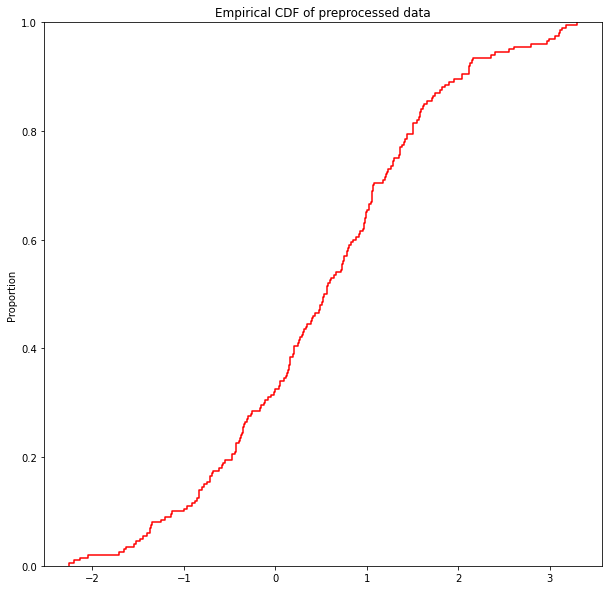

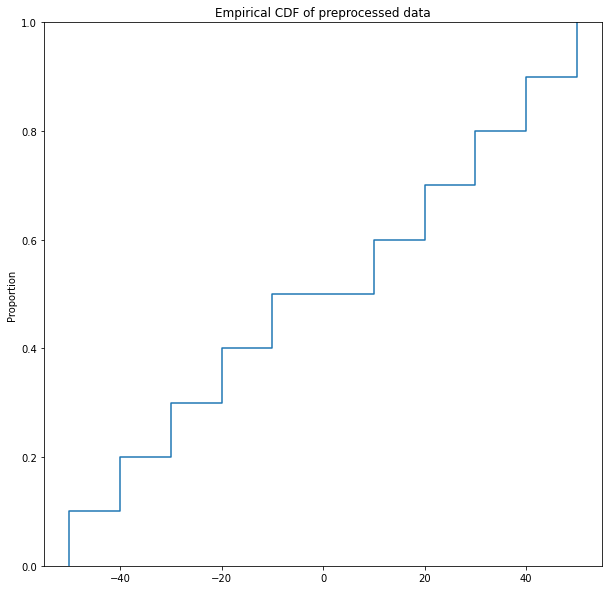

In [53]:
plt.figure(figsize=(10,10))
sns.ecdfplot(data[:, 0], color='red')
plt.title("Empirical CDF of preprocessed data")
plt.show()

plt.figure(figsize=(10,10))
sns.ecdfplot(new_data[:, 0])
plt.title("Empirical CDF of preprocessed data")
plt.show()

### Feature plot of orginal data & Preprocessed data

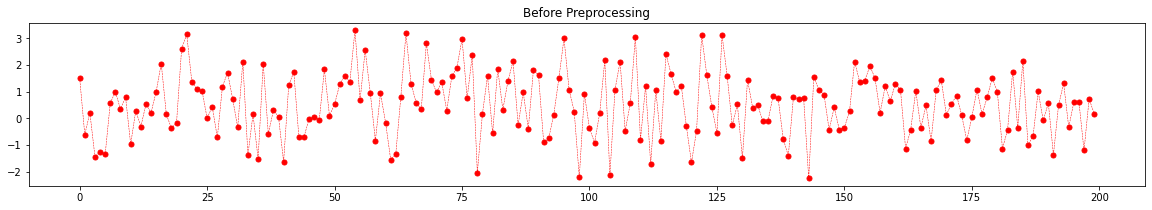

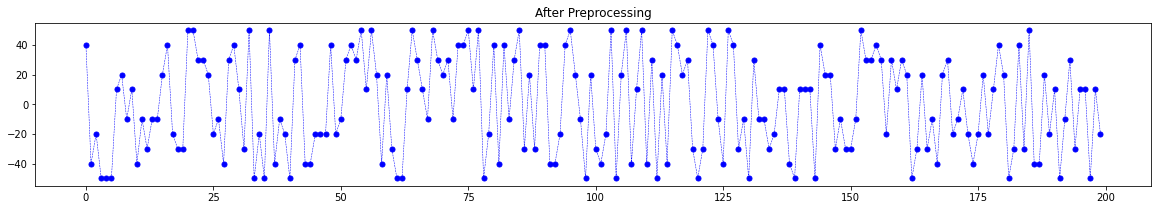

In [178]:
plt.figure(figsize= (20,3))
result = plt.plot(data[:, 0], color='red', marker='o', linestyle='dashed', linewidth=0.5, markersize=5)
plt.title("Before Preprocessing")
plt.show()

plt.figure(figsize= (20,3))
result = plt.plot(new_data[:, 0], color='blue', marker='o', linestyle='dashed', linewidth=0.5, markersize=5)
plt.title("After Preprocessing")
plt.show()


# Model

In [179]:
n_components_ = 20
pca = KernelPCA(n_components = n_components_, kernel = 'linear', degree = 3, max_iter = 1000, gamma = 0.424, coef0 = 0.075)

pca_array = pca.fit_transform(new_data)
pca_df = pd.DataFrame(pca_array, columns=[f"pca{num+1}" for num in range(pca_array.shape[1])])

explained_variance = np.var(pca_array, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)

result = pd.DataFrame({'설명가능한 분산 비율(고윳값)':explained_variance,
             '기여율':explained_variance_ratio},
             
            index=np.array([f"pca{num+1}" for num in range(pca_array.shape[1])]))
result['누적기여율'] = result['기여율'].cumsum()
result

,설명가능한 분산 비율(고윳값),기여율,누적기여율
pca1,3163.336758,0.072392,0.072392
pca2,2938.014118,0.067236,0.139628
pca3,2742.528020,0.062762,0.202390
pca4,2683.686651,0.061416,0.263805
pca5,2545.526856,0.058254,0.322059
pca6,2417.059859,0.055314,0.377373
pca7,2384.836891,0.054576,0.431949
pca8,2309.297589,0.052848,0.484797
pca9,2229.636410,0.051025,0.535822
pca10,2093.090786,0.047900,0.583722


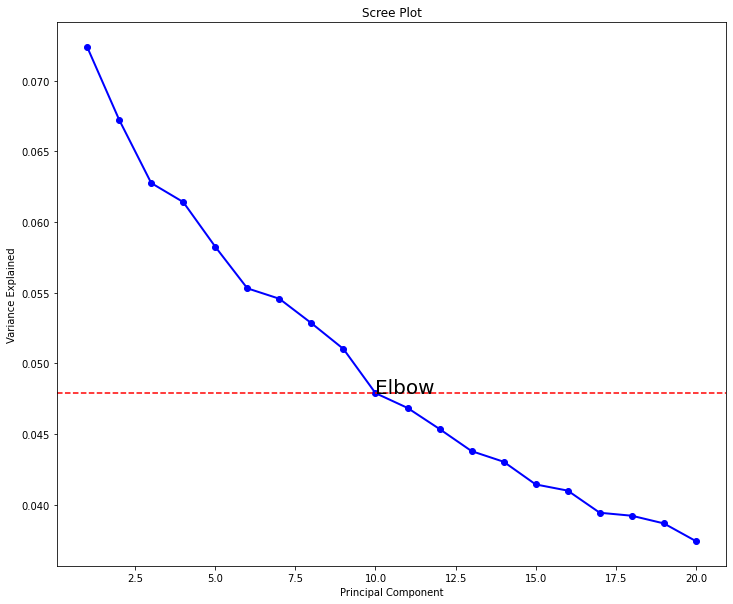

In [183]:
PC_values = np.arange(n_components_) + 1
plt.figure(figsize=(12,10))
plt.plot(PC_values, explained_variance_ratio, 'o-', linewidth=2, color='blue')
plt.axhline(y=explained_variance_ratio[9], color='r', linestyle='--')
plt.text(10, explained_variance_ratio[9], "Elbow", fontsize=20)
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

              precision    recall  f1-score   support

         0.0    0.79091   0.87000   0.82857       200
         1.0    0.85556   0.77000   0.81053       200

    accuracy                        0.82000       400
   macro avg    0.82323   0.82000   0.81955       400
weighted avg    0.82323   0.82000   0.81955       400



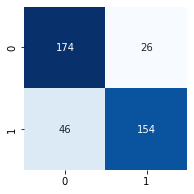

In [181]:
# Extract PCA feature 
pca = KernelPCA(n_components = 10, kernel = 'linear', degree = 3, max_iter = 1000, gamma = 0.424, coef0 = 0.075)
pca_data = pca.fit_transform(new_data) 
pca_testdata = pca.transform(new_testdata)

# Modeling with NuSVC with PCA features 
# NuSVC is cupport vector machine which can controll the number of support vectors. 
svc = NuSVC(nu = 0.64, gamma = 'scale', coef0 = 0.075, kernel = 'poly', degree = 3, max_iter = 1000, probability = True)
svc.fit(pd.concat([pd.DataFrame(new_data),pd.DataFrame(pca_data)], axis = 1), y)
svc_pred = svc.predict(pd.concat([pd.DataFrame(new_testdata),pd.DataFrame(pca_testdata)], axis = 1))

print(classification_report(testy, svc_pred, digits=5))

matrix_confusion = confusion_matrix(testy, svc_pred)
sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', cbar=False)